In [1]:
from wavewatson import Waveform
import numpy as np
from scipy import signal
from pathlib import Path

np.random.seed(42)

# generate analog demo signals

Waveform --> Name:wave_000, Length:1000, SampleRate:2.005e+02, Tstart: 1.611e-02, Tstop:5.000e+00


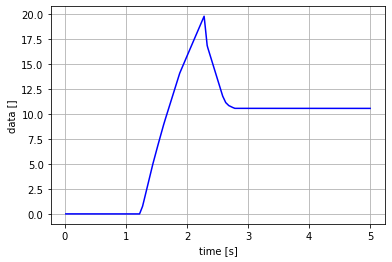

In [2]:
interleaved_vcc_vector = [0.0161126865589023,0.006007635434971181,1.2436404087168746,0.0023429251121576122,1.4393531550257848,4.975916055084067,1.609015302409993,8.769595358374318,1.8816866107060415,14.104456878626232,2.281604529540246,19.79497583356161,2.3024442489642367,17.398956167853484,2.6077293789059124,11.330880986843528,2.6729028697501387,10.881641175083969,2.7742838555078237,10.567173306852277,4.99968143299672,10.563143211784626]

vcc = Waveform(
    data = interleaved_vcc_vector[1::2],
    time = interleaved_vcc_vector[0::2],
)
vcc = vcc.up_sample_interp(nr_points=100).up_sample_interp(nr_points=1000)
print(vcc)
vcc.plot()

Waveform --> Name:wave_000, Length:1000, SampleRate:1.004e+04, Tstart: 1.438e-04, Tstop:9.969e-02


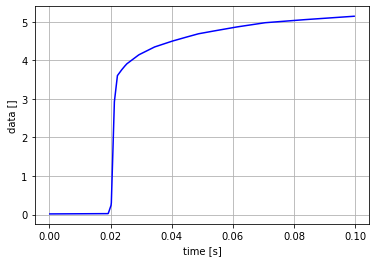

In [3]:
interleaved_vout_vector = [0.0001438089299061751,0.017587055766987714,0.01926768800494738,0.02519812603685656,0.019350345948106806,0.13114427189382782,0.020434962391138844,0.28316723450783865,0.02140805171387461,3.391890397143153,0.021804759265396267,3.5342156788316283,0.0224957189395385,3.6359494993792003,0.025026826150594594,3.8882038689430547,0.029113942705713436,4.134660459364159,0.034260682071418413,4.340040951381745,0.039528477802838635,4.480571741936492,0.04848990267072062,4.682341771411057,0.059994378899943746,4.846646165025126,0.07013648294412744,4.969874460235678,0.08026766451980882,5.034142644922754,0.09969233470385563,5.140384677558494]

vout = Waveform(
    data = interleaved_vout_vector[1::2],
    time = interleaved_vout_vector[0::2],
)
vout = vout.up_sample_interp(nr_points=100).up_sample_interp(nr_points=1000)
print(vout)
vout.plot()

Waveform --> Name:wave_000, Length:5, SampleRate:4.000e+05, Tstart: 0.000e+00, Tstop:1.000e-05


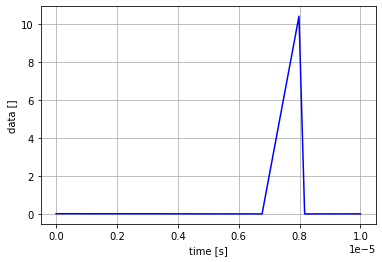

In [4]:
interleaved_gd_vector = [0,0.014813690112914557,6.769024029559811e-06,0.00355304755157444,7.981851536831286e-06,10.43082840185189,8.168195714780557e-06,0.00355304755157444,1.0e-05,0.007464286995044773]
gd_segment = Waveform(
    data = interleaved_gd_vector[1::2],
    time = interleaved_gd_vector[0::2],
)
print(gd_segment)
gd_segment.plot()

Waveform --> Name:wave_000, Length:1000, SampleRate:3.842e+06, Tstart: 0.000e+00, Tstop:2.600e-04


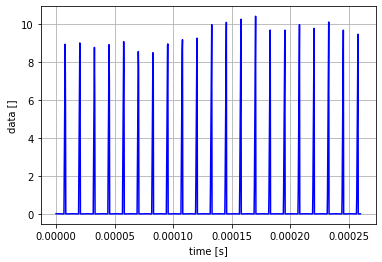

In [5]:
gd = gd_segment.copy()
for amplification in np.random.normal(loc=1, scale=.03, size=20):
    gd.extend(gd_segment * amplification)
gd = gd.up_sample_interp(nr_points=1000)
print(gd)
gd.plot()

Waveform --> Name:wave_021, Length:400, SampleRate:4.000e+02, Tstart: 0.000e+00, Tstop:9.975e-01


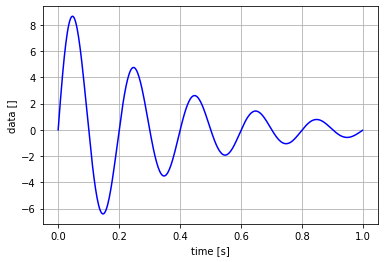

In [6]:
timeVector = np.arange(0, 1, 0.0025)
shiftedTimeVector = timeVector.copy() - 0.5
shiftedTimeVector[0:200] = 0.0
freq = 5
offs = 0
ampl = 10
damping = 3
sine = Waveform(
    time=timeVector,
    data=(offs + ampl * np.sin(2 * np.pi * freq * timeVector) * np.exp(-timeVector * damping)),
)
print(sine)
sine.plot()

# save signals to disk

In [7]:
basepath = Path.cwd() / "demo_signals"
basepath.mkdir(parents=True, exist_ok=True)
vcc.save_to_file(basepath / "vcc.npz")
vout.save_to_file(basepath / "vout.npz")
gd.save_to_file(basepath / "gd.npz")
sine.save_to_file(basepath / "sine.npz")